## Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn

### Introduction:

k-Nearest-Neighbors (k-NN) is a supervised machine learning model. Supervised learning is when a model learns from data that is already labeled. A supervised learning model takes in a set of input objects and output values. The model then trains on that data to learn how to map the inputs to the desired output so it can learn to make predictions on unseen data.

k-NN models work by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points. For example, if k = 5, and 3 of points are ‘green’ and 2 are ‘red’, then the data point in question would be labeled ‘green’, since ‘green’ is the majority (as shown in the above graph). Scikit-learn is a machine learning library for Python. In this tutorial, we will build a k-NN model using Scikit-learn to predict whether or not a patient has diabetes.


In [1]:
import pandas as pd
from IPython.display import Image

#read in the data using pandas
data = pd.read_csv('diabetes_data.csv')

#check the fist five columns
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


check number of rows and columns in dataset

In [2]:

data.shape

(768, 9)

We can see that we have 768 rows of data (potential diabetes patients) and 9 columns (8 input features and 1 target output).
Split up the dataset into inputs and targets. Create a dataframe with all training data except the target column

In [3]:
X = data.drop(columns=['diabetes']) #the diabetes columns is the target variable (y)

Validate target variable has been removed

In [4]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


##### Initial the Target variable

In [5]:
y = data['diabetes'].values

#view target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

##### Split dataset into training and test data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

##### Build the model

Let's build KNN classifier model. First, import the KNeighborsClassifier module and create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function. Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

Create a new k-NN classifier and set ‘n_neighbors’ to 3

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

We create a new k-NN classifier and set ‘n_neighbors’ to 3. A new data point is labeled with by majority from the 3 nearest points. We will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data(To train our new model)

##### Model Testing

In [8]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

We test the model once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data. As seen when inspecting ‘y’ earlier, 0 indicates that the patient does not have diabetes and 1 indicates that the patient does have diabetes. To save space, we will only show print the first 5 predictions of our test set.

We can see that the model predicted ‘no diabetes’ for the first 4 patients in the test set and ‘has diabetes’ for the 5th patient. Now let’s see how our accurate our model is on the full test set. To do this, we will use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.

In [9]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.6688311688311688

Our model has an accuracy of approximately 66.88%. It’s a good start, but we will see how we can increase model performance below.

k-Fold Cross-Validation 

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set. For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set. This can be seen in the graph below.

k fold images


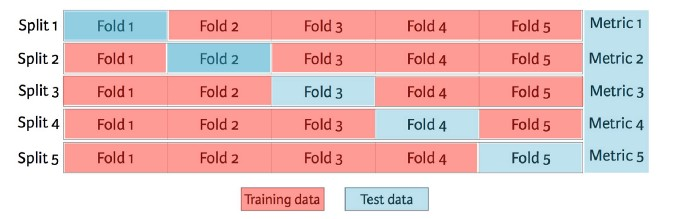

In [11]:
Image("k fold image.jpeg")

The train-test-split method we used in earlier is called ‘holdout’. Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. We will save the accuracy scores in the ‘cv_scores’ variable.

To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


Using cross-validation, our mean score is about 71.36%. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

Hypertuning model parameters using GridSearchCV

When built our initial k-NN model, we set the parameter ‘n_neighbors’ to 3 as a starting point with no real logic behind that choice.

Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.

Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [13]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

After training, we can check which of our values for ‘n_neighbors’ that we tested performed the best. To do this, we will call ‘best_params_’ on our model.

Check top performing n_neighbors value

In [14]:
knn_gscv.best_params_

{'n_neighbors': 14}

We can see that 14 is the optimal value for ‘n_neighbors’. We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 14. ‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.

Check mean score for the top performing value of n_neighbors

In [15]:
knn_gscv.best_score_

0.7578558696205755

Conclusion:

By using grid search to find the optimal parameter for our model, we have improved our model accuracy by over 4%